# Kinematics Fundamentals with Julia

**Learning Objectives:** By the end of this notebook, you will:
- Understand position, velocity, and acceleration relationships
- Apply kinematic equations to solve motion problems
- Analyze projectile motion in two dimensions
- Model real-world scenarios like free fall and basketball shots

**Prerequisites:** Basic algebra, trigonometry
**CoCalc Features:** Julia kernel, interactive physics simulations

---

## Introduction

Kinematics describes motion mathematically without considering forces. We'll explore how objects move through space and time.

In [1]:
# Setup Julia environment
using Plots
using Printf
gr()  # Use GR backend for CoCalc

# Physical constants
const g = 9.81  # Acceleration due to gravity (m/s²)

println("Julia environment ready for kinematics!")
println("Julia version: ", VERSION)

Julia environment ready for kinematics!


Julia version: 1

.11.6


## The Kinematic Equations

For constant acceleration, we have three fundamental equations:

1. **Position:** $x = x_0 + v_0t + \frac{1}{2}at^2$

2. **Velocity:** $v = v_0 + at$

3. **Velocity-Position:** $v^2 = v_0^2 + 2a(x - x_0)$

Where:
- $x$ = position, $v$ = velocity, $a$ = acceleration
- Subscript 0 denotes initial values
- $t$ = time

## Example 1: Free Fall

An object dropped from rest experiences constant downward acceleration g = 9.81 m/s².

Free Fall Results:
Time to impact: 3.19 seconds


Impact velocity: 31.3 m/s (112.8 km/h)


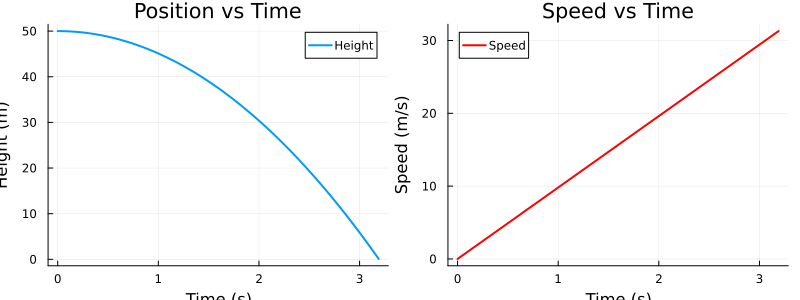

In [2]:
# Free fall from a building
h0 = 50.0    # Initial height (m)
v0 = 0.0     # Initial velocity (m/s) - dropped from rest

# Calculate time to hit ground using: h = h0 - 0.5*g*t²
t_impact = sqrt(2*h0/g)
v_impact = g * t_impact

@printf("Free Fall Results:\n")
@printf("Time to impact: %.2f seconds\n", t_impact)
@printf("Impact velocity: %.1f m/s (%.1f km/h)\n", v_impact, v_impact*3.6)

# Visualize the motion
t = 0:0.01:t_impact
height = h0 .- 0.5*g*t.^2
velocity = -g*t

p1 = plot(t, height, 
    xlabel="Time (s)", ylabel="Height (m)",
    title="Position vs Time", linewidth=2, label="Height")

p2 = plot(t, abs.(velocity), 
    xlabel="Time (s)", ylabel="Speed (m/s)",
    title="Speed vs Time", linewidth=2, color=:red, label="Speed")

plot(p1, p2, layout=(1,2), size=(800,300))

## Example 2: Projectile Motion

Projectile motion combines horizontal motion (constant velocity) with vertical motion (constant acceleration).

In [3]:
# Function to calculate projectile trajectory
function projectile_trajectory(v0, θ_deg)
    θ = deg2rad(θ_deg)
    vx = v0 * cos(θ)  # Horizontal velocity component
    vy = v0 * sin(θ)  # Vertical velocity component
    
    # Key parameters
    t_flight = 2 * vy / g        # Total flight time
    range = vx * t_flight         # Horizontal range
    h_max = vy^2 / (2*g)         # Maximum height
    
    # Generate trajectory points
    t = 0:0.01:t_flight
    x = vx .* t
    y = vy .* t .- 0.5*g*t.^2
    
    return x, y, range, h_max, t_flight
end

println("Projectile function ready!")

Projectile function ready!


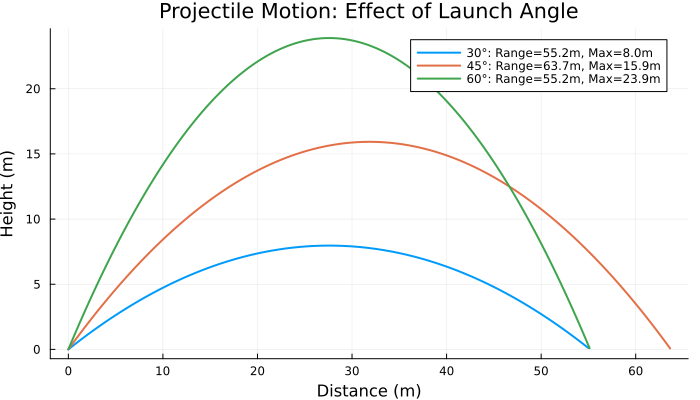

In [4]:
# Compare different launch angles
v_initial = 25.0  # m/s
angles = [30, 45, 60]

plot(title="Projectile Motion: Effect of Launch Angle",
     xlabel="Distance (m)", ylabel="Height (m)",
     size=(700,400), legend=:topright)

for angle in angles
    x, y, range, h_max, t_flight = projectile_trajectory(v_initial, angle)
    plot!(x, y, linewidth=2,
          label=@sprintf("%d°: Range=%.1fm, Max=%.1fm", angle, range, h_max))
end

plot!()

## Finding the Optimal Launch Angle

For maximum range on level ground, the optimal launch angle is 45°. Let's verify this!

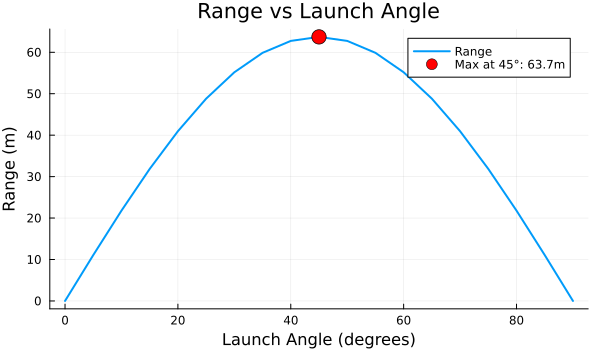

In [5]:
# Analyze range vs angle
angles_test = 0:5:90
ranges = [projectile_trajectory(v_initial, angle)[3] for angle in angles_test]

# Find maximum
max_range, max_idx = findmax(ranges)
optimal_angle = angles_test[max_idx]

plot(angles_test, ranges,
     xlabel="Launch Angle (degrees)", ylabel="Range (m)",
     title="Range vs Launch Angle", linewidth=2,
     label="Range", size=(600,350))

scatter!([optimal_angle], [max_range], markersize=8, color=:red,
        label=@sprintf("Max at %d°: %.1fm", optimal_angle, max_range))

plot!()

## Real-World Application: Basketball Shot

Let's analyze a basketball free throw using kinematics.

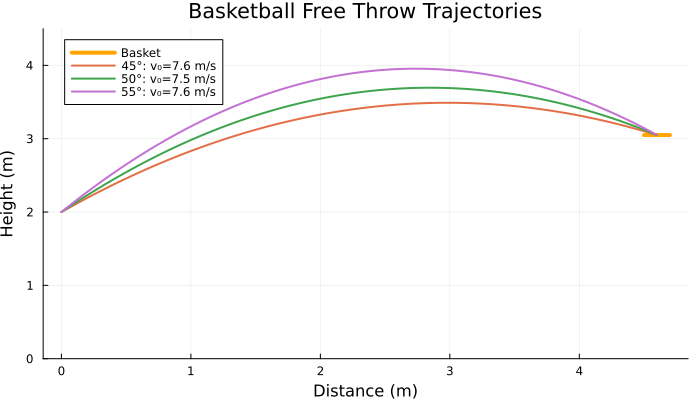

In [6]:
# Basketball free throw parameters
release_height = 2.0      # m
basket_height = 3.05      # m  
distance_to_basket = 4.6  # m

function basketball_shot(angle_deg)
    θ = deg2rad(angle_deg)
    Δy = basket_height - release_height
    
    # Calculate required initial velocity
    # Using kinematic equations for the parabolic path
    v0_squared = (g * distance_to_basket^2) / 
                 (2 * cos(θ)^2 * (distance_to_basket*tan(θ) - Δy))
    
    if v0_squared < 0
        return nothing  # Shot impossible at this angle
    end
    
    v0 = sqrt(v0_squared)
    vx = v0 * cos(θ)
    vy = v0 * sin(θ)
    
    # Generate trajectory
    t_total = distance_to_basket / vx
    t = 0:0.01:t_total
    x = vx .* t
    y = release_height .+ vy .* t .- 0.5*g*t.^2
    
    return v0, x, y
end

# Visualize different shooting angles
plot(title="Basketball Free Throw Trajectories",
     xlabel="Distance (m)", ylabel="Height (m)",
     size=(700,400), ylims=(0, 4.5))

# Draw basket
plot!([distance_to_basket-0.1, distance_to_basket+0.1], 
      [basket_height, basket_height],
      linewidth=4, color=:orange, label="Basket")

for angle in [45, 50, 55]
    result = basketball_shot(angle)
    if result !== nothing
        v0, x, y = result
        plot!(x, y, linewidth=2,
              label=@sprintf("%d°: v₀=%.1f m/s", angle, v0))
    end
end

plot!()

## Try It Yourself!

Modify the parameters below to explore different scenarios:

In [7]:
# Modify these parameters!
YOUR_VELOCITY = 20.0  # m/s (try 10-50)
YOUR_ANGLE = 40       # degrees (try 15-75)
YOUR_HEIGHT = 1.0     # m initial height (try 0-5)

# Calculate trajectory
θ = deg2rad(YOUR_ANGLE)
vx = YOUR_VELOCITY * cos(θ)
vy = YOUR_VELOCITY * sin(θ)

# Time to hit ground (solving quadratic equation)
a = -0.5*g
b = vy
c = YOUR_HEIGHT
t_impact = (-b - sqrt(b^2 - 4*a*c)) / (2*a)

# Generate trajectory
t = 0:0.01:t_impact
x = vx .* t
y = YOUR_HEIGHT .+ vy .* t .- 0.5*g*t.^2

# Calculate metrics
range = vx * t_impact
max_height = YOUR_HEIGHT + vy^2/(2*g)

# Plot
plot(x, y, linewidth=2, label="Your trajectory",
     xlabel="Distance (m)", ylabel="Height (m)",
     title="Your Custom Projectile", size=(700,400))

@printf("\nResults:\n")
@printf("Range: %.1f m\n", range)
@printf("Max height: %.1f m\n", max_height)
@printf("Flight time: %.1f s\n", t_impact)


Results:
Range: 41.3 m


Max height: 9.4 m
Flight time: 2.7 s


## CoCalc for Physics

**Why use CoCalc for physics simulations?**

- **Pre-installed Julia**: Scientific computing environment ready to use
- **Collaboration**: Work on physics problems with classmates in real-time
- **TimeTravel**: Review your solution process step-by-step
- **Visualization**: Create interactive plots and animations
- **No Setup**: Start solving physics problems immediately

**CoCalc-specific tips:**
- Share notebooks with instructors for homework submission
- Use chat to discuss problems with study partners
- Export visualizations for lab reports
- Access GPU for complex simulations

## Summary

You've learned fundamental kinematics concepts:

 **Kinematic Equations** - Relating position, velocity, and acceleration  
 **Free Fall** - Motion under constant gravitational acceleration  
 **Projectile Motion** - 2D motion with independent x and y components  
 **Optimal Angles** - 45° for maximum range on level ground  
 **Real Applications** - Basketball shots and other practical scenarios  

### Key Formulas:
- Position: $x = x_0 + v_0t + \frac{1}{2}at^2$
- Velocity: $v = v_0 + at$
- Range: $R = \frac{v_0^2 \sin(2\theta)}{g}$
- Max height: $h = \frac{v_0^2 \sin^2(\theta)}{2g}$

### Next Steps:
1. Study forces and Newton's laws (dynamics)
2. Explore circular motion
3. Learn about energy and momentum
4. Investigate oscillations and waves

**Continue your physics journey at [CoCalc.com](https://cocalc.com)!**